# 蒐集資料

## 591租屋 爬蟲

### 爬取首頁，取得 token

In [1]:
import requests
from bs4 import BeautifulSoup

session = requests.session()
response1 = session.get('https://rent.591.com.tw/?kind=0&region=1')
soup = BeautifulSoup(response1.text, 'html.parser')
token = soup.select_one('meta[name="csrf-token"]')['content']
token

'LVRQUgDMQn8S2t7f8da9tLZeC34UdDESgLE6Ir89'

### 嘗試爬取第一頁資料

In [2]:
headers = {
    'X-CSRF-TOKEN': token,
    'X-Requested-With': 'XMLHttpRequest'
}
response2 = session.get(
    'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=0&searchtype=1&region=1',
    headers=headers)
response2_json = response2.json()
response2_json.keys()

dict_keys(['status', 'data', 'records', 'is_recom', 'deal_recom', 'online_social_user', 'bluekai_data'])

### 轉換成資料表，檢查數量及欄位

In [3]:
import pandas as pd

df = pd.DataFrame(response2_json['data']['data'])
print('total data:', len(df))
df.head(1)

total data: 30


,id,user_id,address,type,post_id,regionid,sectionid,streetid,room,area,...,icon_class,fulladdress,address_img_title,browsenum_name,unit,houseid,region_name,section_name,addInfo,onepxImg
0,8369405,352699,重慶北路二段~全新..,1,8369405,1,2,25591,2,20.0,...,rent,重慶北路二段~全新裝潢優質兩房~馬上入住~阿智!,~全新裝潢優質兩房~馬上入住~阿智!,昨日瀏覽,元/月,8369405,台北市,大同區,,


### 爬取所有臺北地區資料

In [4]:
import math
from time import sleep

total_rows = 11500
page_rows = 30
total_page = math.ceil(total_rows // page_rows)
datas = []
for page in range(total_page):
    first_row = page * page_rows
    response3 = session.get(
        f'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=0&searchtype=1&region=1'
        f'&firstRow={first_row}&totalRows={total_rows}',
        headers=headers
    )
    response3_json = response3.json()
    df = pd.DataFrame(response3_json['data']['data'])
    datas.append(df)

    if page % 10 == 0:
        print('Page:', page + 1)

    sleep(10)

Page: 1
Page: 11
Page: 21
Page: 31
Page: 41
Page: 51
Page: 61
Page: 71
Page: 81
Page: 91
Page: 101
Page: 111
Page: 121
Page: 131
Page: 141
Page: 151
Page: 161
Page: 171
Page: 181
Page: 191
Page: 201
Page: 211
Page: 221
Page: 231
Page: 241
Page: 251
Page: 261
Page: 271
Page: 281
Page: 291
Page: 301
Page: 311
Page: 321
Page: 331
Page: 341
Page: 351
Page: 361
Page: 371
Page: 381


### 輸出成 excel

In [5]:
df = pd.concat(datas)
print('total data:', len(df))
df.to_excel('591_house_taipei.xlsx')

total data: 11483


# 資料轉換與清洗

## 讀取 excel

In [1]:
import pandas as pd

temp_df = pd.read_excel('591_house_taipei.xlsx')
pd.set_option('display.max_columns', 100)

In [2]:
df = temp_df
df.head(1)

,Unnamed: 0,id,user_id,address,type,post_id,regionid,sectionid,streetid,room,area,price,storeprice,comment_total,comment_unread,comment_ltime,hasimg,kind,shape,houseage,posttime,updatetime,refreshtime,checkstatus,status,closed,living,condition,isvip,mvip,is_combine,cover,browsenum,browsenum_all,floor2,floor,ltime,cases_id,social_house,distance,search_name,mainarea,balcony_area,groundarea,linkman,housetype,street_name,alley_name,lane_name,addr_number_name,kind_name_img,address_img,cases_name,layout,layout_str,allfloor,floorInfo,house_img,houseimg,cartplace,space_type_str,photo_alt,addition4,addition2,addition3,vipimg,vipstyle,vipBorder,new_list_comment_total,comment_class,price_hide,kind_name,photoNum,filename,nick_name,new_img,regionname,sectionname,icon_name,icon_class,fulladdress,address_img_title,browsenum_name,unit,houseid,region_name,section_name,addInfo,onepxImg
0,0,8388371,2687990,羅斯福路二段66巷古亭捷運..,1,8388371,1,1,25860,2,18.5,"36,500",0,0,1,1572778028,1,1,2,0,5分鐘內,1572192630,1574233802,5,NaN,0,"advstore,market,night,park,school,hospital","icebox,cold,hotwater,lift,naturalgas,cook,trab...",1,1,1,https://hp1.591.com.tw/house/active/2019/08/30...,135,2646,0,4,2019-11-20 15:12:05,NaN,0,0,NaN,NaN,NaN,NaN,王先生,2,羅斯福路二段,66巷,NaN,2號,整層住家,古亭捷運站口，生活機能好。中正國中學區。,合安大廈,2房2廳1衛,"<span class=""layout"">2房2廳1衛</span>，</span>",12,樓層：4/12,"153116192,153116193,153116194,153116195,153116...",NaN,NaN,NaN,"台北租屋,中正租屋,整層住家出租,古亭捷運站口，生活機能好。中正國中學區。",1,0,0,NaN,isvip,vipStyle,0,none,price-hide,整層住家,6,https://hp1.591.com.tw/house/active/2019/08/30...,代理人 王先生,NaN,台北市,中正區,出租,rent,羅斯福路二段66巷古亭捷運站口，生活機能好。中正國中學區。,古亭捷運站口，生活機能好。中正國中學區。,昨日瀏覽,元/月,8388371,台北市,中正區,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11483 entries, 0 to 11482
Data columns (total 89 columns):
Unnamed: 0                11483 non-null int64
id                        11483 non-null int64
user_id                   11483 non-null int64
address                   11483 non-null object
type                      11483 non-null int64
post_id                   11483 non-null int64
regionid                  11483 non-null int64
sectionid                 11483 non-null int64
streetid                  11483 non-null int64
room                      11483 non-null int64
area                      11483 non-null float64
price                     11483 non-null object
storeprice                11483 non-null int64
comment_total             11483 non-null int64
comment_unread            11483 non-null int64
comment_ltime             11483 non-null int64
hasimg                    11483 non-null int64
kind                      11483 non-null int64
shape                     11483 non-null 

## 資料轉換

In [4]:
# df.drop(['addInfo', 'addr_number_name', 'address', 'address_img', 'address_img_title', 'alley_name', 'browsenum_name',
#          'cases_name', 'comment_class', 'cover', 'filename', 'fulladdress', 'house_img', 'icon_class', 'icon_name',
#          'kind_name_img', 'lane_name', 'layout_str', 'linkman', 'new_img', 'nick_name', 'photo_alt', 'posttime',
#          'region_name', 'regionname', 'sectionname', 'street_name', 'unit', 'vipBorder', 'vipimg'],
#         axis=1, inplace=True)
df.head(1).select_dtypes(include='object')

,address,price,posttime,living,condition,cover,ltime,linkman,street_name,alley_name,lane_name,addr_number_name,kind_name_img,address_img,cases_name,layout,layout_str,floorInfo,house_img,photo_alt,vipimg,vipstyle,vipBorder,comment_class,price_hide,kind_name,filename,nick_name,new_img,regionname,sectionname,icon_name,icon_class,fulladdress,address_img_title,browsenum_name,unit,region_name,section_name,addInfo
0,羅斯福路二段66巷古亭捷運..,"36,500",5分鐘內,"advstore,market,night,park,school,hospital","icebox,cold,hotwater,lift,naturalgas,cook,trab...",https://hp1.591.com.tw/house/active/2019/08/30...,2019-11-20 15:12:05,王先生,羅斯福路二段,66巷,NaN,2號,整層住家,古亭捷運站口，生活機能好。中正國中學區。,合安大廈,2房2廳1衛,"<span class=""layout"">2房2廳1衛</span>，</span>",樓層：4/12,"153116192,153116193,153116194,153116195,153116...","台北租屋,中正租屋,整層住家出租,古亭捷運站口，生活機能好。中正國中學區。",NaN,isvip,vipStyle,none,price-hide,整層住家,https://hp1.591.com.tw/house/active/2019/08/30...,代理人 王先生,NaN,台北市,中正區,出租,rent,羅斯福路二段66巷古亭捷運站口，生活機能好。中正國中學區。,古亭捷運站口，生活機能好。中正國中學區。,昨日瀏覽,元/月,台北市,中正區,NaN


In [5]:
section_mapping = {
    '中正區': 0,
    '大同區': 1,
    '中山區': 2,
    '松山區': 3,
    '大安區': 4,
    '萬華區': 5,
    '信義區': 6,
    '士林區': 7,
    '北投區': 8,
    '內湖區': 9,
    '南港區': 10,
    '文山區': 11,
}
df['section_id'] = df['section_name'].map(lambda x: section_mapping.get(x))
df['section_id'].head(1)

0    0
Name: section_id, dtype: int64

In [6]:
df[['bedroom', 'livingroom', 'bathroom']] = df['layout'].str.extract('(\d?)房(\d?)廳(\d?)衛').fillna('0').astype(int)
df[['bedroom', 'livingroom', 'bathroom']].head(1)

,bedroom,livingroom,bathroom
0,2,2,1


In [7]:
df['price'] = df['price'].map(lambda x: int(x.replace(',', '')))
# df['address'].str.extract('(.+?[縣市])(.+?[區市鄉鎮])(.+?[路街巷])').head()
df['price'].head(1)

0    36500
Name: price, dtype: int64

In [8]:
# df = df.select_dtypes(exclude=['object'])

## 繪制圖表

Populating the interactive namespace from numpy and matplotlib


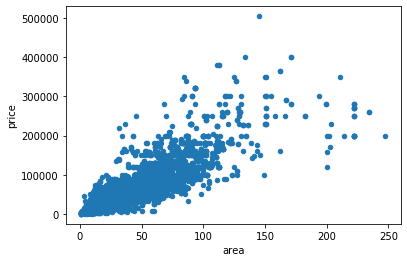

In [9]:
%pylab inline
df = df[df['area'] < 300]
df.plot(x='area', y='price', kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dc46e50>,
      dtype=object)

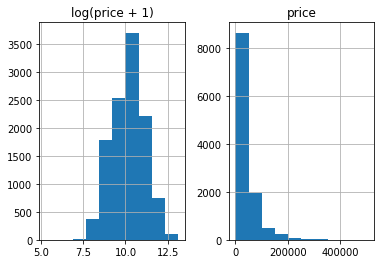

In [10]:
prices = pd.DataFrame({'price': df['price'], 'log(price + 1)': np.log1p(df['price'])})
prices.hist()

# 回歸分析

## 線性回歸

In [11]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
X = df[['area']]
Y = df['price'].values
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
df['area'][0:5]

0    18.5
1     5.0
2    69.0
3     7.0
4    40.0
Name: area, dtype: float64

In [13]:
clf.predict(X)[0:5]

array([ 28057.73527457,   8789.09244448, 100136.73252786,  11643.70619709,
        58744.83311508])

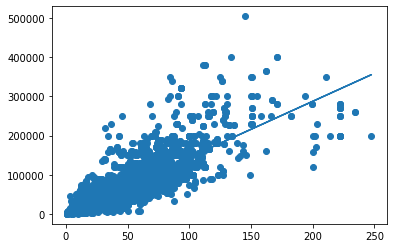

In [14]:
plt.scatter(X, Y)
plt.plot(X, clf.predict(X))
plt.show()

## 多項式線性回歸

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

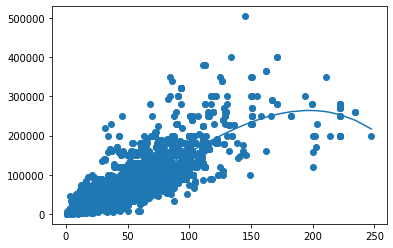

In [16]:
X2 = X.sort_values(['area'])
X2_ = poly_reg.transform(X2)

plt.scatter(X, Y)
plt.plot(X2, regr.predict(X2_))
plt.show()

# 多元回歸分析

## 確認參數

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11477 entries, 0 to 11482
Data columns (total 93 columns):
Unnamed: 0                11477 non-null int64
id                        11477 non-null int64
user_id                   11477 non-null int64
address                   11477 non-null object
type                      11477 non-null int64
post_id                   11477 non-null int64
regionid                  11477 non-null int64
sectionid                 11477 non-null int64
streetid                  11477 non-null int64
room                      11477 non-null int64
area                      11477 non-null float64
price                     11477 non-null int64
storeprice                11477 non-null int64
comment_total             11477 non-null int64
comment_unread            11477 non-null int64
comment_ltime             11477 non-null int64
hasimg                    11477 non-null int64
kind                      11477 non-null int64
shape                     11477 non-null i

In [18]:
df.head(1).select_dtypes(int)

,Unnamed: 0,id,user_id,type,post_id,regionid,sectionid,streetid,room,price,storeprice,comment_total,comment_unread,comment_ltime,hasimg,kind,shape,houseage,updatetime,refreshtime,checkstatus,closed,isvip,mvip,is_combine,browsenum,browsenum_all,floor2,floor,social_house,distance,housetype,allfloor,addition4,addition2,addition3,new_list_comment_total,photoNum,houseid,section_id,bedroom,livingroom,bathroom
0,0,8388371,2687990,1,8388371,1,1,25860,2,36500,0,0,1,1572778028,1,1,2,0,1572192630,1574233802,5,0,1,1,1,135,2646,0,4,0,0,2,12,1,0,0,0,6,8388371,0,2,2,1


In [19]:
column_type = df['bedroom'].unique()
column_type, len(column_type)

(array([2, 0, 4, 3, 1, 5, 7, 6, 8, 9]), 10)

## 多元回歸分析 - 所有可能參數

In [20]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
X = df[['sectionid', 'housetype', 'area', 'floor', 'allfloor',
        'bedroom', 'livingroom', 'bathroom',
        'id', 'post_id', 'kind']]
Y = df['price'].values
regression.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regression.predict(X)[0:5]

array([ 28363.35657157,   9874.33423102, 100053.36203708,  10913.03794323,
        44675.1612189 ])

## OLS - 參數評估

In [22]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4469.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:25:56   Log-Likelihood:            -1.2994e+05
No. Observations:               11477   AIC:                         2.599e+05
Df Residuals:                   11466   BIC:                         2.600e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6983.7599   5244.607     -1.332      0.1

/Users/user/.local/share/virtualenvs/python-machine-learning-NYdCQkSJ/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 檢驗多元回歸模型

In [23]:
predictor_cols = X.columns

In [24]:
import itertools

AICs = {}
for k in range(1, len(predictor_cols) + 1):
    for variables in itertools.combinations(predictor_cols, k):
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic

In [25]:
from collections import Counter

c = Counter(AICs)
c.most_common()[::-1][0:3]

[(('sectionid',
   'housetype',
   'area',
   'floor',
   'allfloor',
   'bedroom',
   'livingroom',
   'bathroom',
   'kind'),
  259908.6836760997),
 (('sectionid',
   'housetype',
   'area',
   'floor',
   'allfloor',
   'bedroom',
   'livingroom',
   'bathroom',
   'id',
   'post_id',
   'kind'),
  259909.93053248513),
 (('sectionid',
   'housetype',
   'area',
   'floor',
   'allfloor',
   'bedroom',
   'livingroom',
   'bathroom',
   'post_id',
   'kind'),
  259909.93053248513)]

## OLS - 參數檢驗

In [26]:
import statsmodels.api as sm

important_predictors = [
    'sectionid',
    'housetype',
    'area',
    'floor',
    'allfloor',
    'bedroom',
    'livingroom',
    'bathroom',
    'kind'
]
X = df[important_predictors]
Y = df['price']

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4966.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:26:10   Log-Likelihood:            -1.2994e+05
No. Observations:               11477   AIC:                         2.599e+05
Df Residuals:                   11467   BIC:                         2.600e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2480.3221    743.328     -3.337      0.0

## 多元回歸分析 - 重要分析參數

### 線性回歸

In [27]:
from sklearn.linear_model import LinearRegression

X = df[important_predictors]
Y = df['price']
clf = LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, clf.predict(X))

399781023.7661828

### 隨機森林

In [29]:
from sklearn.ensemble import RandomForestRegressor

X = df[important_predictors]
Y = df['price']
clf2 = RandomForestRegressor()
clf2.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, clf2.predict(X))

23669517.429290373

## 測試

In [31]:
sectionid = 1
housetype = 1
area = 10
floor = 1
allfloor = 5
bedroom = 1
livingroom = 1
bathroom = 1
kind = 1
test_data = numpy.array([[sectionid,
                          housetype,
                          area,
                          floor,
                          allfloor,
                          bedroom,
                          livingroom,
                          bathroom,
                          kind]])
clf.predict(test_data), clf2.predict(test_data)

(array([18147.06719643]), array([16410.49]))